# Adding Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB # 2 şey için
from sklearn.naive_bayes import MultinomialNB# 3 ve daha fazla için
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Reading Csv

In [3]:
df=pd.read_csv("failure.csv")

## EDA 

In [4]:
df.sample(15)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
53003,2015-03-13,W1F0TATM,0,79465432,0,0,6,32,250821,0,0,0
47577,2015-03-05,W1F0P3FR,0,82417216,0,0,0,12,300691,0,0,1
85322,2015-05-25,S1F0S30R,0,172933256,0,0,0,16,265492,0,0,0
115825,2015-08-25,W1F1NS0C,0,240875616,0,0,0,6,282726,0,0,0
13632,2015-01-16,S1F044ET,0,162065464,0,0,0,5,247535,0,0,0
94443,2015-06-20,S1F0Y8MA,0,75683760,0,0,0,8,213604,0,0,0
59227,2015-03-22,W1F1DQR9,0,114316808,0,0,0,8,26,0,0,0
124117,2015-10-21,W1F1CJ3G,0,80079808,0,7,0,8,326827,0,0,0
79738,2015-05-09,Z1F0LNQB,0,108555768,0,0,0,10,468342,0,0,0
87119,2015-05-30,S1F10RWZ,0,54668256,0,0,0,13,262118,0,0,0


In [5]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

<AxesSubplot:xlabel='failure', ylabel='count'>

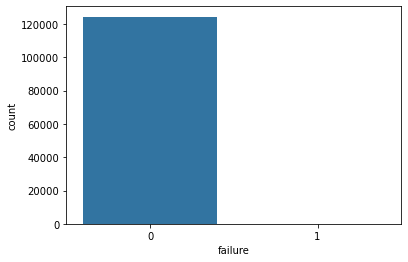

In [7]:
sns.countplot(x="failure",data=df)

## Feature Enginnering
### - undersampling

In [8]:
minlen=len(df[df["failure"]==1])
minlen

106

In [9]:
major_ind=df[df["failure"]==0].index
major_ind

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            124484, 124485, 124486, 124487, 124488, 124489, 124490, 124491,
            124492, 124493],
           dtype='int64', length=124388)

In [10]:
import random
rand_maj_ind=np.random.choice(major_ind,minlen,replace=False)
len(rand_maj_ind)

106

In [11]:
min_ind=df[df["failure"]==1].index
min_ind

Int64Index([  4885,   6879,   8823,  11957,  12668,  14734,  15087,  15773,
             15859,  15898,
            ...
            107586, 108173, 108625, 109371, 109395, 109927, 114251, 122118,
            122808, 124329],
           dtype='int64', length=106)

In [12]:
under_sample_ind=np.concatenate([min_ind,rand_maj_ind])

In [13]:
under_sample=df.loc[under_sample_ind]

<AxesSubplot:xlabel='failure', ylabel='count'>

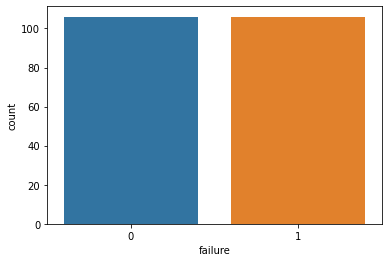

In [14]:
sns.countplot(x="failure",data=under_sample)

In [15]:
under_sample.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0


In [16]:
under_sample["device"].nunique()

196

In [17]:
under_sample.drop("date",axis=1,inplace=True)

In [18]:
under_sample=pd.get_dummies(under_sample,drop_first=True)

## Fit and Predict

In [19]:
x= under_sample.loc[:, under_sample.columns!="failure"]
y = under_sample.loc[:, under_sample.columns=="failure"]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [21]:
y_train.shape

(169, 1)

In [22]:
g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
d=DecisionTreeClassifier()
gbc=GradientBoostingClassifier()
svc=SVC()

In [30]:
g.fit(x_train,y_train)
y_pred=g.predict(x_test)

In [24]:
algorithms = [g,b,k,d,gbc,svc]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Single Tree','Gradient Boost',"SVC"]

**- I edited the funcation for DataFrame**

In [25]:
def evaluate_model():
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x_train, y_train)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        if accuracy_score(y_test, algorithms[i].predict(x_test)) == 1:
            accuracy.append(0)
        else:   
            accuracy.append(accuracy_score(y_test, algorithms[i].predict(x_test)))
        if precision_score(y_test, algorithms[i].predict(x_test)) == 1:
            precision.append(0)
        else:   
            precision.append(precision_score(y_test, algorithms[i].predict(x_test)))
        if recall_score(y_test, algorithms[i].predict(x_test)) == 1:
            recall.append(0)
        else:   
            recall.append(recall_score(y_test, algorithms[i].predict(x_test)))
        if f1_score(y_test, algorithms[i].predict(x_test)) == 1:
            f1.append(0)
        else:   
            f1.append(f1_score(y_test, algorithms[i].predict(x_test)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('Accuracy', ascending = False)

In [26]:
evaluate_model()

,Accuracy,Precision,Recall,F1
BernoulliNB,0.860465,0.800000,0.952381,0.869565
Gradient Boost,0.813953,0.760000,0.904762,0.826087
Single Tree,0.744186,0.678571,0.904762,0.775510
GaussianNB,0.558140,0.583333,0.333333,0.424242
SVC,0.534884,0.515152,0.809524,0.629630
K Nearest,0.348837,0.347826,0.380952,0.363636
